In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [3]:
def imshow(img):
    plt.imshow(img, cmap='gray')
    plt.show()

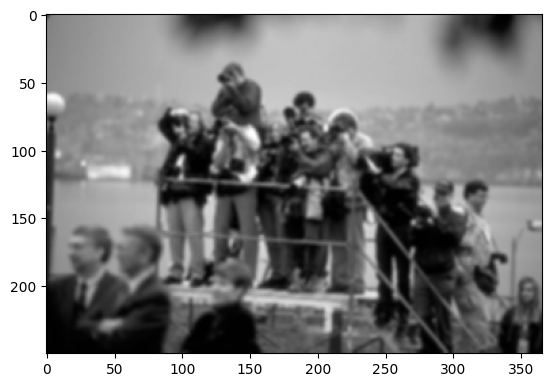

In [5]:
image = cv2.imread('blur.tif', cv2.IMREAD_GRAYSCALE)
imshow(image)

## Enhance Image using preprocessing techniques
Image enhancement is the process of improving the quality and appearance of an image. It can be used to correct flaws or defects in an image, or to simply make an image more visually appealing.\
Some common goals of image enhancement include increasing contrast, sharpness, and colorfulness; reducing noise and blur; and correcting distortion and other defects.

<span style="color:blue;">Adjust Brightness and Contrast</span>

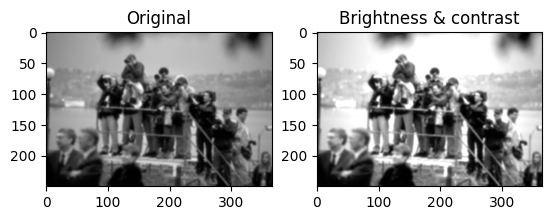

In [13]:
plt.subplot(1, 2, 1) 
plt.title("Original") 
plt.imshow(image,cmap='gray') 

brightness = 1.2
contrast = 1.4

image2 = cv2.addWeighted(image, contrast,
                         np.zeros(image.shape, image.dtype), 
                         0, brightness)
plt.subplot(1, 2, 2) 
plt.title("Brightness & contrast") 
plt.imshow(image2, cmap='gray') 
plt.show()

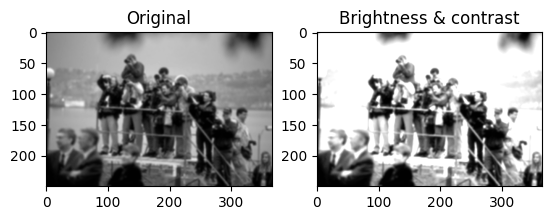

In [15]:
plt.subplot(1, 2, 1) 
plt.title("Original") 
plt.imshow(image, cmap='gray') 
  
# Adjust the brightness and contrast  
# g(i,j)=α⋅f(i,j)+β 
# control Contrast by 1.5 
alpha = 1.5  
# control brightness by 50 
beta = 50  
image2 = cv2.convertScaleAbs(image, alpha=alpha, beta=beta) 

#Plot the contrast image 
plt.subplot(1, 2, 2) 
plt.title("Brightness & contrast") 
plt.imshow(image2, cmap='gray') 
plt.show() 

<span style="color:blue;">Sharpening Images</span>

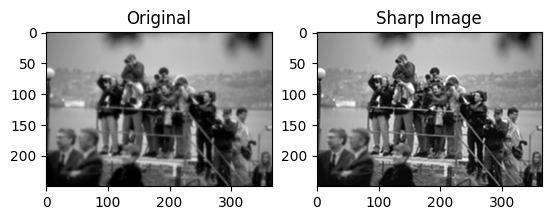

In [16]:
plt.subplot(1, 2, 1) 
plt.title("Original") 
plt.imshow(image, cmap='gray') 

kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])

sharp_image = cv2.filter2D(image, -1, kernel)

plt.subplot(1, 2, 2)
plt.title("Sharp Image")
plt.imshow(sharp_image, cmap='gray');

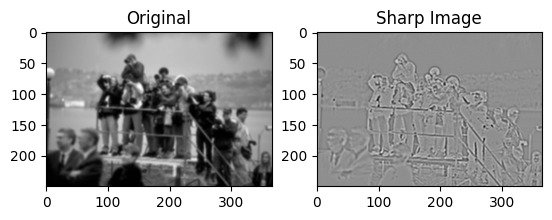

In [20]:
plt.subplot(1, 2, 1) 
plt.title("Original") 
plt.imshow(image, cmap='gray') 

sharp_image = cv2.Laplacian(image, cv2.CV_64F)

plt.subplot(1, 2, 2)
plt.title("Sharp Image")
plt.imshow(sharp_image, cmap='gray');

<span style="color:blue;">Removing Noise from Images</span>

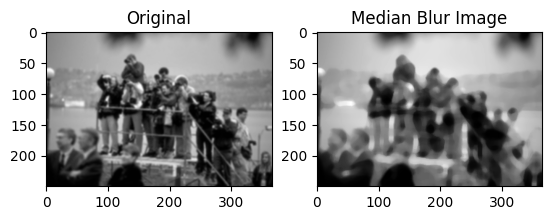

In [28]:
plt.subplot(1, 2, 1) 
plt.title("Original") 
plt.imshow(image, cmap='gray') 

filtered_image = cv2.medianBlur(image, 11)

plt.subplot(1, 2, 2)
plt.title("Median Blur Image")
plt.imshow(filtered_image, cmap='gray');

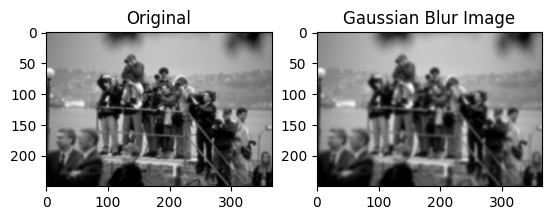

In [29]:
plt.subplot(1, 2, 1) 
plt.title("Original") 
plt.imshow(image, cmap='gray') 

filtered_image = cv2.GaussianBlur(image, (7, 7), 0)

plt.subplot(1, 2, 2)
plt.title("Gaussian Blur Image")
plt.imshow(filtered_image, cmap='gray');

<span style="color:blue;">Enhancing color in Images</span>

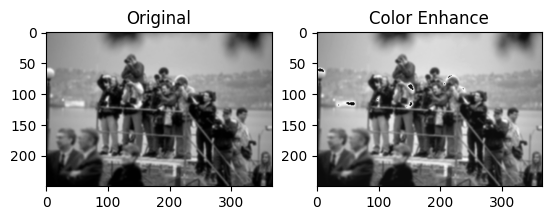

In [39]:
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')

image3 = image.copy()
image3[:,:] = image[:,:] * 1.12

plt.subplot(1, 2, 2)
plt.title("Color Enhance")
plt.imshow(image3, cmap='gray')

<span style="color:blue;">Image resizing and scaling</span>

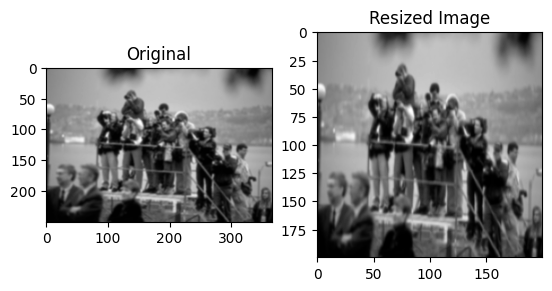

In [40]:
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')

resized_image = cv2.resize(image, (200, 200))

plt.subplot(1, 2, 2)
plt.title("Resized Image")
plt.imshow(resized_image, cmap='gray');

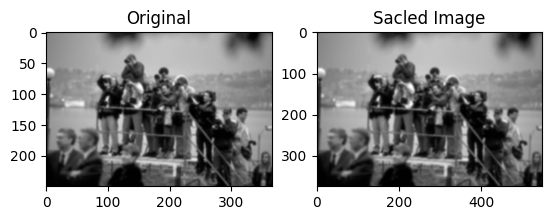

In [42]:
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')

scaled_image = cv2.resize(image, None, fx=1.5, fy=1.5)

plt.subplot(1, 2, 2)
plt.title("Sacled Image")
plt.imshow(scaled_image, cmap='gray');

<span style="color:blue;">Inverse Transform</span>

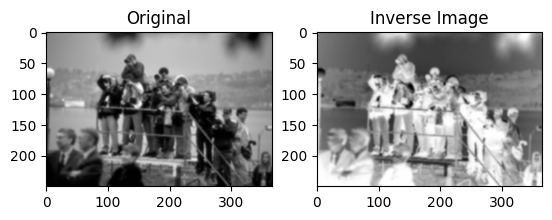

In [43]:
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')

inverse_image = 255 - image

plt.subplot(1, 2, 2)
plt.title("Inverse Image")
plt.imshow(inverse_image, cmap='gray');

<span style="color:blue;">Equalizing histograms</span>

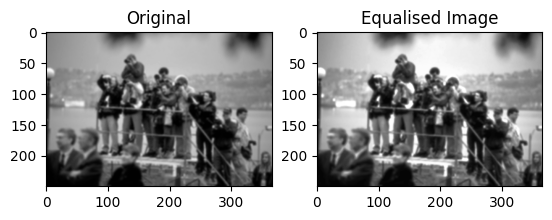

In [44]:
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')

equalised_image = cv2.equalizeHist(image)

plt.subplot(1, 2, 2)
plt.title("Equalised Image")
plt.imshow(equalised_image, cmap='gray');

<span style="color:blue;">Morphological transformations</span>

#### Erosion
- Binarize the image.
- As it is advised to keep the foreground in white, we are performing OpenCV’s invert operation on the binarized image to make the foreground as white.
- We are defining a 5×5 kernel filled with ones
- Then we can make use of Opencv erode() function to erode the boundaries of the image.

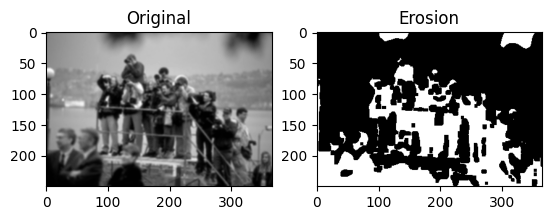

In [50]:
binr = cv2.threshold(image, 127, 255, 
                     cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
kernel = np.ones((5, 5), np.uint8)

invert = cv2.bitwise_not(binr)

erosion = cv2.erode(invert, kernel, iterations=1)

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Erosion")
plt.imshow(erosion, cmap='gray');

#### Dilation
- Binarize the image.
- As it is advised to keep the foreground in white, we are performing OpenCV’s invert operation on the binarized image to make the foreground white.
- We are defining a 3×3 kernel filled with ones
- Then we can make use of the Opencv dilate() function to dilate the boundaries of the image.

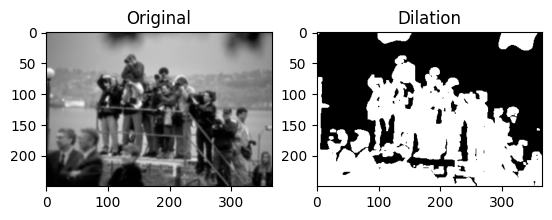

In [51]:
# binarize the image 
binr = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1] 
  
# define the kernel 
kernel = np.ones((3, 3), np.uint8) 
  
# invert the image 
invert = cv2.bitwise_not(binr) 
  
# dilate the image 
dilation = cv2.dilate(invert, kernel, iterations=1)

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Dilation")
plt.imshow(dilation, cmap='gray');

#### Opening
- Binarize the image.
- We are defining a 3×3 kernel filled with ones
- Then we can make use of the Opencv cv.morphologyEx() function to perform an Opening operation on the image.

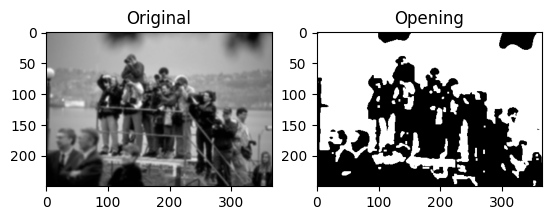

In [52]:
binr = cv2.threshold(image, 0, 255, 
                     cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1] 
  
# define the kernel 
kernel = np.ones((3, 3), np.uint8) 
  
# opening the image 
opening = cv2.morphologyEx(binr, cv2.MORPH_OPEN, 
                           kernel, iterations=1)

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Opening")
plt.imshow(opening, cmap='gray');

#### Closing
- Binarize the image.
- We are defining a 3×3 kernel filled with ones
- Then we can make use of the Opencv cv.morphologyEx() function to perform a Closing operation on the image.

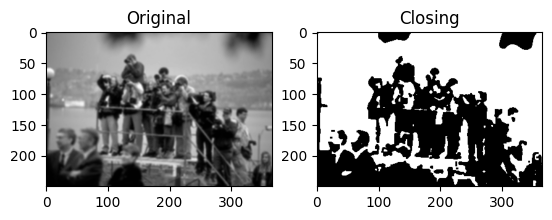

In [53]:
binr = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1] 
  
# define the kernel 
kernel = np.ones((3, 3), np.uint8) 
  
# opening the image 
closing = cv2.morphologyEx(binr, cv2.MORPH_CLOSE, kernel, iterations=1) 

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Closing")
plt.imshow(closing, cmap='gray');

#### Morphological Gradient
- Binarize the image.
- As it is advised to keep the foreground in white, we are performing OpenCV’s invert operation on the binarized image to make the foreground as white.
- We are defining a 3×3 kernel filled with ones
- Then we can make use of the Opencv cv.morphologyEx() function to perform a Morphological gradient on the image.

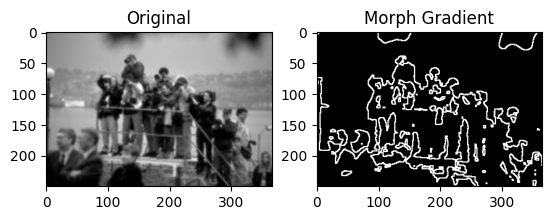

In [54]:
binr = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1] 
  
# define the kernel 
kernel = np.ones((3, 3), np.uint8) 
  
# invert the image 
invert = cv2.bitwise_not(binr) 
  
# use morph gradient 
morph_gradient = cv2.morphologyEx(invert, 
                                  cv2.MORPH_GRADIENT,  
                                  kernel) 
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Morph Gradient")
plt.imshow(morph_gradient, cmap='gray');

#### Top Hat
- Binarize the image.
- We are defining a 13×13 kernel filled with ones.
- Then we can make use of the Opencv cv.morphologyEx() function to perform a Top Hat operation on the image.

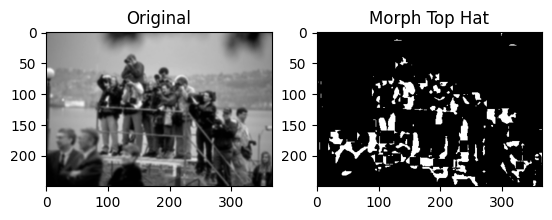

In [55]:
binr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1] 
  
# define the kernel 
kernel = np.ones((13, 13), np.uint8) 
  
# use morph gradient 
morph_gradient = cv2.morphologyEx(binr, 
                                  cv2.MORPH_TOPHAT, 
                                  kernel) 
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Morph Top Hat")
plt.imshow(morph_gradient, cmap='gray');

#### Black Hat
- Binarize the image.
- As it is advised to keep the foreground white, we are performing OpenCV’s invert operation on the binarized image to make the foreground as white.
- We are defining a 5×5 kernel filled with ones.
- Then we can use the Opencv cv.morphologyEx() function to perform a Top Hat operation on the image.

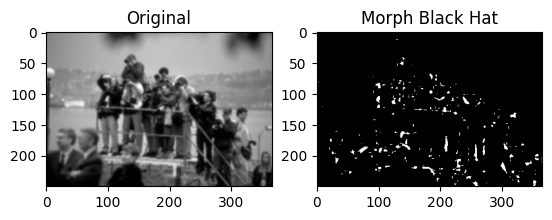

In [56]:
binr = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1] 
  
# define the kernel 
kernel = np.ones((5, 5), np.uint8) 
  
# invert the image 
invert = cv2.bitwise_not(binr) 
  
# use morph gradient 
morph_gradient = cv2.morphologyEx(invert, 
                                  cv2.MORPH_BLACKHAT, 
                                  kernel) 
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Morph Black Hat")
plt.imshow(morph_gradient, cmap='gray');

<span style="color:blue;">Image thresholding</span>

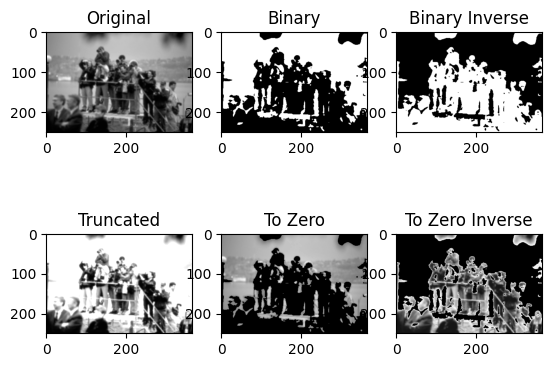

In [58]:
ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY) 
ret, thresh2 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV) 
ret, thresh3 = cv2.threshold(img, 120, 255, cv2.THRESH_TRUNC) 
ret, thresh4 = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO) 
ret, thresh5 = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO_INV) 

plt.subplot(2,3,1)
plt.title("Original")
plt.imshow(image, cmap = 'gray')

plt.subplot(2, 3, 2)
plt.title("Binary")
plt.imshow(thresh1, cmap='gray')

plt.subplot(2, 3, 3)
plt.title("Binary Inverse")
plt.imshow(thresh2, cmap='gray')

plt.subplot(2, 3, 4)
plt.title("Truncated")
plt.imshow(thresh3, cmap='gray')

plt.subplot(2, 3, 5)
plt.title("To Zero")
plt.imshow(thresh4, cmap='gray')

plt.subplot(2, 3, 6)
plt.title("To Zero Inverse")
plt.imshow(thresh5, cmap='gray')

plt.show()

<span style="color:blue;">Edge detection</span>

In [61]:
def canny_edge_detection(frame): 
    # Convert the frame to grayscale for edge detection 
    gray = frame
      
    # Apply Gaussian blur to reduce noise and smoothen edges 
    blurred = cv2.GaussianBlur(src=gray, ksize=(3, 5), sigmaX=0.5) 
      
    # Perform Canny edge detection 
    edges = cv2.Canny(blurred, 70, 135) 
      
    return blurred, edges

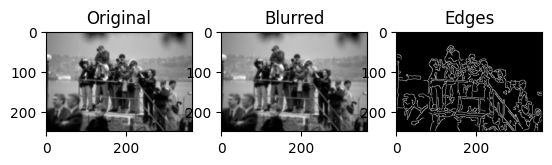

In [62]:
blurred, edges = canny_edge_detection(image)

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Blurred")
plt.imshow(blurred, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Edges")
plt.imshow(edges, cmap='gray');